![Massively](https://html5up.net/uploads/images/massively.jpg)

# Nikola Themes

This posts describes my process of creating a new Nikola theme based on the [HTML5 UP](https://html5up.net) template called [Massively](https://html5up.net/massively).
<!-- TEASER_END -->

# Setup

## Environment

To ensure everything is reproducible, we first initialize an [Conda] environment for this work.  *([Conda] is a package manager, originally designed for python, but with support for other resources.  Eventually, we can publish an [Anaconda] package so that everything can be installed with a single command.)*

[Anaconda]: https://anaconda.org/
[Conda]: https://conda.io/docs/

```bash
conda create -n blog3 python=3
conda config --add channels conda-forge
. activate blog3
conda install jinja2         \ # I prefer this templating engine than Mako
              ws4py watchdog \ # Allows one to use "nikola auto"
              pyphen         \ # Hyphenation
              typogrify        # Nicer typography.
pip install --upgrade pip
pip install Nikola 
nikola plugin -i sass           # HTML5UP uses sass 
```

*The results are shown in [Installed Packages](#Installed-Packages) at the bottom of this notebook.*

I also would like to use [Sass](https://sass-lang.com/install) since the HTMP5UP themes come Sass-enabled, so this needs to be installed.  First you will need to install Ruby for your platform and make sure that Gems is installed.  Once this is done, you can install Sass with:

```bash
gem install sass
```

## Initialize a Website

To initialize a new site, activate the environment and then run

```
. activate blog3
nikola init --demo
```

*(The `--demo` option will add some initial posts.  If you have not use Nikola before, then you should start with this.)*

Now you can build and inspect the default website:

```
. activate blog3
nikola auto   # Requires the ws4py and watchdog packages
```

This should build the site (all the files go into the `output` folder) and then serve it at http://localhost:8000.  The `auto` command will watch and rebuild the site if you modify any files.

## Create the Theme

Now we want to create a new theme.  Since we would like to share this theme, we will create a [repository for it on github](https://github.com/mforbes/nikola-theme-html5up-massively).  I am basing the theme on `base-jinja` because I want the simplest theme (most of the styling will come from the HTML5UP templates, so I don't need anything fancy from the theme) and prefer to use the [Jinja2](http://jinja.pocoo.org/docs/2.10/) templating engine.  *(Apparently [Mako](http://www.makotemplates.org/) is more powerful, but several people commented that for HTML, Jinja is easier to edit as it visually stands out from the HTML code.)*

```bash
nikola theme --new=html5-massively \
             --engine=jinja \
             --parent=base-jinja \
             --url=https://github.com/mforbes/nikola-theme-html5up-massively \
             --legacy-meta  # Creates parent and engine files for use with older Nikola versions
```

This places the theme into the `themes/html5-massively` directory.  Now I want to version control this, so I clone my version from github and put everything here:

```bash
hg clone git@github.com:mforbes/nikola-theme-html5up-massively
mv nikola-theme-html5up-massively/* themes/html5-massively/
mv nikola-theme-html5up-massively/.* themes/html5-massively/
rmdir nikola-theme-html5up-massively
cd themes/html5-massively/
hg add
hg com -m "Initial commit of theme after running 'nikola theme --new'"
```

*(Note: I prefer using mercurial so I am am using the [`hg-git`](http://hg-git.github.io/) Mercurial plugin here.)* 

## Use the Theme

To use the theme, edit `conf.py` and change the line:

```ini
THEME = "html5up-massively"
```

# Structure

## Nikola Theme

Nikola themes inherit from their parent, so our theme is functional because it has `base-jinja` as the parent.  To better understand what is here, we can copy the `base-jinja` theme for inspection.

```bash
cp -r /data/apps/anaconda/envs/blog3/lib/python3.6/site-packages/nikola/data/themes/base-jinja themes/
```

*(With some themes you can install them using `nikola theme --install` to copy them, but the base themes are pre-installed and so will not be copied.  If you try to install the theme, you will see where it is located.)*

```bash
$ nikola theme -i base-jinja}
...
ERROR: theme: Theme 'base-jinja' is already installed in /data/apps/anaconda/envs/blog3/lib/python3.6/site-packages/nikola/data/themes/base-jinja
```

The theme is organized as follows:

```
$ tree themes/base-jinja/
themes/base-jinja/
|-- base-jinja.theme
`-- templates
    |-- post.tmpl
    |-- page.tmpl
    ...
```

Here is the structure of the theme.  At the top level, a site is composed of posts and pages.  These each have their own templates.  The main entry-points are:

* [`post.tmpl`]: Use for blog posts.
* [`page.tmpl`]: Use for blog posts.
* [`slides.tmpl`]: Use for image slideshows.

These "extend" various other templates using the following inheritance structure:

[`annotation_helper.tmpl`]: https://raw.githubusercontent.com/getnikola/nikola/master/nikola/data/themes/base-jinja/templates/annotation_helper.tmpl
[`archive_navigation_helper.tmpl`]: https://raw.githubusercontent.com/getnikola/nikola/master/nikola/data/themes/base-jinja/templates/archive_navigation_helper.tmpl
[`archiveindex.tmpl`]: https://raw.githubusercontent.com/getnikola/nikola/master/nikola/data/themes/base-jinja/templates/archiveindex.tmpl
[`author.tmpl`]: https://raw.githubusercontent.com/getnikola/nikola/master/nikola/data/themes/base-jinja/templates/author.tmpl
[`authorindex.tmpl`]: https://raw.githubusercontent.com/getnikola/nikola/master/nikola/data/themes/base-jinja/templates/authorindex.tmpl
[`authors.tmpl`]: https://raw.githubusercontent.com/getnikola/nikola/master/nikola/data/themes/base-jinja/templates/authors.tmpl
[`base.tmpl`]: https://raw.githubusercontent.com/getnikola/nikola/master/nikola/data/themes/base-jinja/templates/base.tmpl
[`base_footer.tmpl`]: https://raw.githubusercontent.com/getnikola/nikola/master/nikola/data/themes/base-jinja/templates/base_footer.tmpl
[`base_header.tmpl`]: https://raw.githubusercontent.com/getnikola/nikola/master/nikola/data/themes/base-jinja/templates/base_header.tmpl
[`base_helper.tmpl`]: https://raw.githubusercontent.com/getnikola/nikola/master/nikola/data/themes/base-jinja/templates/base_helper.tmpl
[`comments_helper.tmpl`]: https://raw.githubusercontent.com/getnikola/nikola/master/nikola/data/themes/base-jinja/templates/comments_helper.tmpl
[`comments_helper_disqus.tmpl`]: https://raw.githubusercontent.com/getnikola/nikola/master/nikola/data/themes/base-jinja/templates/comments_helper_disqus.tmpl
[`comments_helper_facebook.tmpl`]: https://raw.githubusercontent.com/getnikola/nikola/master/nikola/data/themes/base-jinja/templates/comments_helper_facebook.tmpl
[`comments_helper_googleplus.tmpl`]: https://raw.githubusercontent.com/getnikola/nikola/master/nikola/data/themes/base-jinja/templates/comments_helper_googleplus.tmpl
[`comments_helper_intensedebate.tmpl`]: https://raw.githubusercontent.com/getnikola/nikola/master/nikola/data/themes/base-jinja/templates/comments_helper_intensedebate.tmpl
[`comments_helper_isso.tmpl`]: https://raw.githubusercontent.com/getnikola/nikola/master/nikola/data/themes/base-jinja/templates/comments_helper_isso.tmpl
[`comments_helper_livefyre.tmpl`]: https://raw.githubusercontent.com/getnikola/nikola/master/nikola/data/themes/base-jinja/templates/comments_helper_livefyre.tmpl
[`comments_helper_mustache.tmpl`]: https://raw.githubusercontent.com/getnikola/nikola/master/nikola/data/themes/base-jinja/templates/comments_helper_mustache.tmpl
[`comments_helper_muut.tmpl`]: https://raw.githubusercontent.com/getnikola/nikola/master/nikola/data/themes/base-jinja/templates/comments_helper_muut.tmpl
[`crumbs.tmpl`]: https://raw.githubusercontent.com/getnikola/nikola/master/nikola/data/themes/base-jinja/templates/crumbs.tmpl
[`feeds_translations_helper.tmpl`]: https://raw.githubusercontent.com/getnikola/nikola/master/nikola/data/themes/base-jinja/templates/feeds_translations_helper.tmpl
[`gallery.tmpl`]: https://raw.githubusercontent.com/getnikola/nikola/master/nikola/data/themes/base-jinja/templates/gallery.tmpl
[`index.tmpl`]: https://raw.githubusercontent.com/getnikola/nikola/master/nikola/data/themes/base-jinja/templates/index.tmpl
[`index_helper.tmpl`]: https://raw.githubusercontent.com/getnikola/nikola/master/nikola/data/themes/base-jinja/templates/index_helper.tmpl
[`list.tmpl`]: https://raw.githubusercontent.com/getnikola/nikola/master/nikola/data/themes/base-jinja/templates/list.tmpl
[`list_post.tmpl`]: https://raw.githubusercontent.com/getnikola/nikola/master/nikola/data/themes/base-jinja/templates/list_post.tmpl
[`listing.tmpl`]: https://raw.githubusercontent.com/getnikola/nikola/master/nikola/data/themes/base-jinja/templates/listing.tmpl
[`math_helper.tmpl`]: https://raw.githubusercontent.com/getnikola/nikola/master/nikola/data/themes/base-jinja/templates/math_helper.tmpl
[`page.tmpl`]: https://raw.githubusercontent.com/getnikola/nikola/master/nikola/data/themes/base-jinja/templates/page.tmpl
[`pagination_helper.tmpl`]: https://raw.githubusercontent.com/getnikola/nikola/master/nikola/data/themes/base-jinja/templates/pagination_helper.tmpl
[`post.tmpl`]: https://raw.githubusercontent.com/getnikola/nikola/master/nikola/data/themes/base-jinja/templates/post.tmpl
[`post_header.tmpl`]: https://raw.githubusercontent.com/getnikola/nikola/master/nikola/data/themes/base-jinja/templates/post_header.tmpl
[`post_helper.tmpl`]: https://raw.githubusercontent.com/getnikola/nikola/master/nikola/data/themes/base-jinja/templates/post_helper.tmpl
[`post_list_directive.tmpl`]: https://raw.githubusercontent.com/getnikola/nikola/master/nikola/data/themes/base-jinja/templates/post_list_directive.tmpl
[`sectionindex.tmpl`]: https://raw.githubusercontent.com/getnikola/nikola/master/nikola/data/themes/base-jinja/templates/sectionindex.tmpl
[`slides.tmpl`]: https://raw.githubusercontent.com/getnikola/nikola/master/nikola/data/themes/base-jinja/templates/slides.tmpl
[`story.tmpl`]: https://raw.githubusercontent.com/getnikola/nikola/master/nikola/data/themes/base-jinja/templates/story.tmpl
[`tag.tmpl`]: https://raw.githubusercontent.com/getnikola/nikola/master/nikola/data/themes/base-jinja/templates/tag.tmpl
[`tagindex.tmpl`]: https://raw.githubusercontent.com/getnikola/nikola/master/nikola/data/themes/base-jinja/templates/tagindex.tmpl
[`tags.tmpl	`]: https://raw.githubusercontent.com/getnikola/nikola/master/nikola/data/themes/base-jinja/templates/tags.tmpl

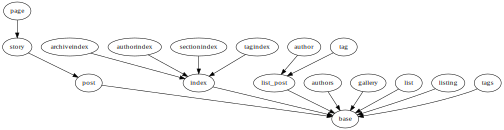

In [58]:
graphviz.Source('digraph {\n\tpage\n\tpost\n\tarchiveindex -> index\n\tauthor -> list_post\n\tauthorindex -> index\n\tauthors -> base\n\tbase\n\tgallery -> base\n\tindex -> base\n\tlist -> base\n\tlist_post -> base\n\tlisting -> base\n\tpage -> story\n\tpost -> base\n\tsectionindex -> index\n\tstory -> post\n\ttag -> list_post\n\ttagindex -> index\n\ttags -> base\n\tsize="7,7"\n}')

In addition, there are a variety of helper files that are "imported":

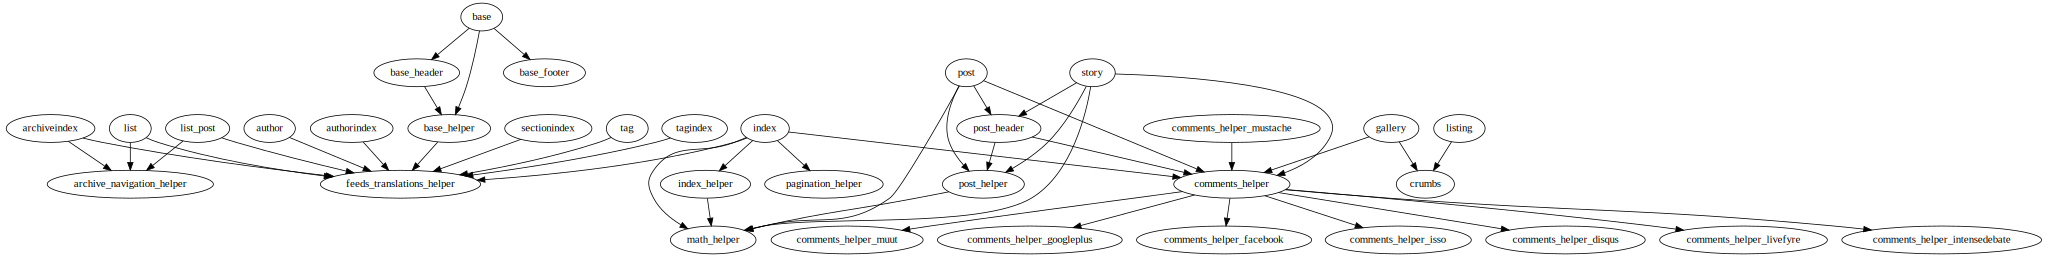

In [63]:
graphviz.Source('digraph {\n\tarchiveindex -> archive_navigation_helper\n\tarchiveindex -> feeds_translations_helper\n\tauthor -> feeds_translations_helper\n\tauthorindex -> feeds_translations_helper\n\tbase -> base_helper\n\tbase -> base_header\n\tbase -> base_footer\n\tbase_header -> base_helper\n\tbase_helper -> feeds_translations_helper\n\tcomments_helper -> comments_helper_disqus\n\tcomments_helper -> comments_helper_livefyre\n\tcomments_helper -> comments_helper_intensedebate\n\tcomments_helper -> comments_helper_muut\n\tcomments_helper -> comments_helper_googleplus\n\tcomments_helper -> comments_helper_facebook\n\tcomments_helper -> comments_helper_isso\n\tcomments_helper_mustache -> comments_helper\n\tgallery -> comments_helper\n\tgallery -> crumbs\n\tindex -> index_helper\n\tindex -> math_helper\n\tindex -> comments_helper\n\tindex -> pagination_helper\n\tindex -> feeds_translations_helper\n\tindex_helper -> math_helper\n\tlist -> archive_navigation_helper\n\tlist -> feeds_translations_helper\n\tlist_post -> archive_navigation_helper\n\tlist_post -> feeds_translations_helper\n\tlisting -> crumbs\n\tpost -> post_helper\n\tpost -> post_header\n\tpost -> comments_helper\n\tpost -> math_helper\n\tpost_header -> post_helper\n\tpost_header -> comments_helper\n\tpost_helper -> math_helper\n\tsectionindex -> feeds_translations_helper\n\tstory -> post_helper\n\tstory -> post_header\n\tstory -> comments_helper\n\tstory -> math_helper\n\ttag -> feeds_translations_helper\n\ttagindex -> feeds_translations_helper\n}')

## HTML5UP Massively

The [HTML5UP Massively](https://html5up.net/massively) template uses [Sass](https://sass-lang.com/) for building its CSS so you ensure you have this installed (see [Setup](#setup)) and configured by changing the following in `conf.py`:

```python
# Compiler to process Sass files.
SASS_COMPILER = 'sass'

# A list of options to pass to the Sass compiler.
# Final command is: SASS_COMPILER SASS_OPTIONS file.s(a|c)ss
SASS_OPTIONS = []
```

Here is the structure of the [HTML5UP Massively](https://html5up.net/massively) template:
```
.
|-- LICENSE.txt
|-- README.txt
|-- assets
|   |-- css
|   |-- fonts
|   |-- js
|   `-- sass
|-- elements.html
|-- generic.html
|-- images
`-- index.html
```

*(See below for the [full Masively structure](#Massively-Structure).)*

The design decision here is how to merge this structure with the template structure.  At one extreme, we can simply replace the top-level templates such as `post.tmpl` with the Massively html files.  At the other extreme, we could map every Nikola feature to a feature in the HTML template.

First we must understand the Massively structure.  The structure is:

* **Intro:** (optional).  This is the massive initial display that you see when on the [main page](https://html5up.net/uploads/demos/massively/index.html).  Note that it does not appear for the [generic pages](https://html5up.net/uploads/demos/massively/generic.html).  This is special and we will probably need some way of specifying it in the index file.  Not sure yet.
* **Header:** This appears after you scroll down on the main page or at the top of the generic pages.  It should probably be the site title.
* **Navigation:** These are the navigation tabs at the top of the page.  They should probably be generated by some sort of post list for the site.  Also included here are the social media icons which should probably be specified in the `conf.py` file.
* **Main:** This is the main content of the page.  The example shown contains post elements with various classes such as `featured` which results in a large full-width post dominating top of page.
* **Footer:** Links to further pages etc., contact information.
* **Copyright:**
* **Scripts:** Links to various javascript etc.

My initial impression is that we should provide a specialized directive for specifying the "Intro" if that is desired on a page, use tags etc. to decide which pieces to include in navigation, and then structure subpages.

### Stage 1: Minimal

Our initial minimal strategy will be to keep all of the Massively styling and just implement the HTML files as templates.  To do this, we keep the HTML5UP contents in a subdirectory `html5up` and make appropriate links to satisfy the Nikola theme organization requirements.  Note: I originally tried the following 

```
.
|-- assets
|   |-- css -> ../html5up/assets/css
|   |-- fonts -> ../html5up/assets/fonts
|   `-- js -> ../html5up/assets/js
`-- sass -> html5up/assets/sass
```

Following the instructions about [Creating a Site (Not a Blog) with Nikola](https://getnikola.com/creating-a-site-not-a-blog-with-nikola.html) we adjust the `conf.py` file as follows:

```python
INDEX_PATH = "blog"
```

This prevents the blog part of the software from generating the main index page.  Now we can create our own index page `pages/index.rst`.

The next step is to insert the contents of the Massively `index.html` page etc. into templates.  We start by creating a special `page_html5up.tmpl` template.  By adding this to the `conf.py` file we can use this to generate the content of the index page (only):

```python
PAGES = (
    ("pages/index.rst", "", "page_html5up.tmpl"),
    ("pages/*.rst", "", "page.tmpl"),
    ...
)
```

*(Note: The order is important - more specific rules must come first.)*

This gets the contents, but fails to render properly because the resources are not where they are expected to be.  In particular, Massively expects the assets to be at the same level as the HTML file, but Nikola has inserted this file into the `pages` subdirectory.  This is easily fixed by making all the references to assets absolute `src="assets/..."` → `src="/assets/..."`.

This demonstrates that everything is in place, but is not useful.  The next step is to move the various bits of the Massive template into the Jinja templates.  To do this, I copied all of the base templates and started editing them:

```
templates/
|-- base.tmpl
|-- base_footer.tmpl
|-- base_header.tmpl
|-- base_helper.tmpl
|-- page.tmpl
|-- post.tmpl
`-- story.tmpl
```

By systematically going through the templates, I was able to insert various pieces of the Massively `index.html` file into the templates, preserving as much of the Nikola functionality as possible.  To make things easier to test, I added the following flag to my `conf.py` file:

```python
GLOBAL_CONTEXT = {
    'html5up': True
}
```

Then, in templates, I could start by inserting the raw bits from the Massively `index.html` file verbatim:

```jinja2
{% macro html_navigation_links() %}
  {% if html5up %}
    {# Massively version #}
    <!-- Nav -->
    <nav id="nav">
    ...
  {% else %}
    {# Nikola version #}
    <nav id="menu">
    ...
  {% endif %}
{% endmacro %}
```

This gets something compiling quickly, then I can start merging the two once I understand things better.

A few things than need to be checked:

* There is code in Nikola to use bundled css files.  This needs to be check to see that it works properly.  (The Massive template uses a `<noscript>...` flag to fallback if javascript is disabled... should this be bundled?)
* There are css files such as `nikola_rst.css` that contain formatting for RST features like admonitions.  These likely will not look good with Massively and will need reformatting.
* To get the images working I symlinked them to the main `images` directory which makes sure they are copied over.  Not sure if this is ideal.  I remember that images should be managed carefully so that thumbnails get created etc. but am not sure if this should apply to background images which should instead be maintained with the theme assets.

### Stage 2

The next step is to think about content: where does the content information come from?  Here we need to look at how Massively is setup.

* **Post lists:** The content of the `index.html` page is a set of teasers for posts.  This should be generated by a customized post-list directive.
* **Navigation:** Nikola provides a dictionary of `NAVIGATION_LINKS` in `conf.py`.  We should use this to setup the main navigation (tabs).  We have integrated this into `base_header.tmpl`. In order for the correct navigation tab to be highlighted, the template uses a test like `{% if rel_link(permalink, url) == "#" %}`.  We can use a similar test `{% if permalink == "/" %}` to check if we are on the langing page.  I am not sure how robust this is, but am using this for now to trigger generation of the main Info. panel in `base.tmpl`.


## Deviations/Issues

* **CSS**: The default Massively styling uses direct selectors to work.  For example, the posts list styling is `#main > .posts > article`.  This will break if there are intervening DIVs inserted, as is done by the post-list-directive for example.  There may be some way of designing the main page to work properly with this restrictive CSS, but the easier solution is probably to remove the `>` and just have the styling apply to the directed structure `#main .posts article` which would allow nested DIVs.  This seems to work but needs some testing.  Doing so also violates the principle of minimal changes to the HTML5UP styling.  We should pay and ask the author if this would be safe in general.
* **Read more...**: The Massively style provides custom "Full Story" buttons.  In principle, these should be the automatically inserted "Read more..." links defined in the `INDEX_READ_MORE_LINK` variable of `conf.py`, but in order to better customize the posts.  When we generate these, we thus use `{{ post.text(teaser_only=True, show_read_more_link=False) }}`.  This will break translation though so for a complete solution, the "Full Story" text should also be translated.
* **Post Images**: The post images play a central role in the site design, so we specify these as part of the metadata for the pages rather than as an `.. image::`.  Pages should thus use a template like:
   
   ```rst
   .. title: Timeline
   .. slug: timeline
   .. date: 2018-04-03 21:05:00 UTC-06:00
   .. tags: featured
   .. category: 
   .. link: 
   .. description: 
   .. type: text
   .. image: /images/bg.jpg

   Timeline
   ========

   This page outlines the life and times of Lynn.

   .. TEASER_END

   Here are the details...
   ```



# Photos

One issue that needs a good solution is figuring out how to manage images.

## Default (Manual) Solution

The default solution for images is to include them in the `/images` folder of the project.  Then they can be references absolutely from the pages and posts.  This requires manually managing the photos which is a bit of a pain, but works quite simply.

## Photo Library

A preferred solution would be to manage the photos using appropriate software like iPhoto, and then programmatically import them from the library.  Here we consider some options.

* [Use 1 of These Photo Managers If You Care About Your Photo Collection](https://www.scanyourentirelife.com/use-of-these-photo-managers-if-care-about-your-photo-collection/)
* [ExifRead](https://pypi.python.org/pypi/ExifRead): Loading metadata from image files.
* [Reading XMP sidecar files with Python and libxmp](https://medium.com/@gullevek/reading-xmp-sidecar-files-with-python-and-libxmp-a4c52e9955bb): This is the format that Adobe Bridge uses to store metadata.

### Adobe Bridge

Adobe Bridge apparently runs for free on both Mac OS X and Windows, so provides a reasonable option for managing the photos.  Photos are stored as files on disk, and metadata is stored in XMP format either in the image files or in "sidecar" files.  Using the `libxmp` interface described above, we should have programmatic access to this information.

### Photos (iPhoto)

Since I work with a Mac, Photos (which replaced iPhoto) is a good option for me.  It appears that there is some support for using iCloud and Photos with Windows, but I have to explore this more.

The problem is how to programmatically interact with the iPhoto library.  The following options exist which may meet our needs:

* [PyiCloud](https://github.com/picklepete/pyicloud): A python interface to iCloud.




# To Do

* **Intro:** To display the "Intro" on the main page only, I used the test `{% if permalink == "/" %}` in `base.tmpl`.  I do not know how robust this is.
* **Feature Post:** Add a directive for the "feature post".
* **Pagination:** I am not sure where pagination should go.  For now, there is a stub in a new block `{% block main_footer %}` in `post.tmpl` which is included inside the `<div id="main></div>`.  This should be autofilled when a post list takes multiple pages.


# Gotchas

Here are a few things that caught me off guard:

* The [global context is not available in post lists](https://getnikola.com/template-variables.html#id2).  So you can't use the `html5up` variable for example to toggle behavior.  *(Not sure why... this is annoying.)*
* By default, restructured text will [gobble the first header](http://docutils.sourceforge.net/docutils/transforms/frontmatter.py) and sub-header and treat them as defining the page title and subtitle.  The information, however, is not actually used to change the Nikola title which is specified in the post meta-data instead.  The following flags (shown with their default values) affect the behavior:

  * `USE_REST_DOCINFO_METADATA=False`: If `True`, then the gobbled title will be used as post metadata.  This is discussed in [issue 2987](https://github.com/getnikola/nikola/issues/2987).
  * `NO_DOCUTILS_TITLE_TRANSFORM=False`: If `True`, then disable the gobbling.  Discussed in [issue #2382](https://github.com/getnikola/nikola/issues/2382).

  I find it best to disable this "feature" setting `NO_DOCUTILS_TITLE_TRANSFORM=True`.

# Resources

* Nikola
    * [Theming Nikola](https://getnikola.com/theming.html): Core theming documentation.
    * [Themes for Nikola](https://themes.getnikola.com/): Demonstration of Nikola themes available through the [Theme Repository](https://github.com/getnikola/nikola-themes).
    * [Creating a Site (Not a Blog) with Nikola](https://getnikola.com/creating-a-site-not-a-blog-with-nikola.html)

* [`nikola-theme-html5up-massively`](https://github.com/mforbes/nikola-theme-html5up-massively): My GitHub repository for the theme.
* Comparing Jinja and Mako:
  * [Python Web Frameworks: What are the advantages and disadvantages of using Mako vs. Jinja2? (Quora)](https://www.quora.com/Python-Web-Frameworks-What-are-the-advantages-and-disadvantages-of-using-Mako-vs-Jinja2)
  * [Mako Jinja2 (stackoverflow)](https://stackoverflow.com/questions/3435972/mako-or-jinja2)
* [A Better Approach For Initializing New Nikola Themes (since v7.7.5)](http://tiao.io/posts/a-better-approach-for-initializing-new-nikola-themes-since-v775/)
* [Creating a Nikola theme with Sass-compiled Bootstrap](http://tiao.io/posts/creating-a-nikola-theme-with-sass-compiled-bootstrap/)

# Logs

## Installed Packages

Here are the packages that I have installed.

In [4]:
%%bash
date
conda list -n blog3

Sun Mar 25 11:48:30 PDT 2018
# packages in environment at /data/apps/anaconda/envs/blog3:
#
# Name                    Version                   Build  Channel
argh                      0.26.2                   py36_1    conda-forge
blinker                   1.4                       <pip>
ca-certificates           2017.08.26           ha1e5d58_0    defaults
certifi                   2018.1.18                py36_0    defaults
chardet                   3.0.4                     <pip>
cloudpickle               0.5.2                     <pip>
docutils                  0.14                      <pip>
doit                      0.31.1                    <pip>
idna                      2.6                       <pip>
jinja2                    2.10             py36hd36f9c5_0    defaults
libcxx                    4.0.1                h579ed51_0    defaults
libcxxabi                 4.0.1                hebd6815_0    defaults
libedit                   3.1                  hb4e282d_0    defaults


```bash
$ nikola init --demo
[2018-03-25T16:52:17Z] WARNING: Nikola: In order to USE_BUNDLES, you must install the "webassets" Python package.
[2018-03-25T16:52:17Z] WARNING: bundles: Setting USE_BUNDLES to False.
Creating Nikola Site
====================

This is Nikola v7.8.13.  We will now ask you a few easy questions about your new site.
If you do not want to answer and want to go with the defaults instead, simply restart with the `-q` parameter.
--- Questions about the site ---
Destination: lynn-memorial-demo
Site title [My Nikola Site]: Remembering Lynn McNeil Forbes
Site author [Nikola Tesla]: Michael McNeil Forbes
Site author's e-mail [n.tesla@example.com]: michael.forbes+lynn@gmail.com
Site description [This is a demo site for Nikola.]: Memorial site for Lynn McNeil Forbes: 1 Nov 1941 - 14 July 2017
Site URL [https://example.com/]: https://alum.mit.edu/www/mforbes/lynn
    The URL does not end in '/' -- adding it.
Enable pretty URLs (/page/ instead of /page.html) that don't need web server configuration? [Y/n] 
--- Questions about languages and locales ---
We will now ask you to provide the list of languages you want to use.
Please list all the desired languages, comma-separated, using ISO 639-1 codes.  The first language will be used as the default.
Type '?' (a question mark, sans quotes) to list available languages.
Language(s) to use [en]: 

Please choose the correct time zone for your blog. Nikola uses the tz database.
You can find your time zone here:
https://en.wikipedia.org/wiki/List_of_tz_database_time_zones

Time zone [America/Los_Angeles]: America/Edmonton
    Current time in America/Edmonton: 10:58:57
Use this time zone? [Y/n] 
--- Questions about comments ---
You can configure comments now.  Type '?' (a question mark, sans quotes) to list available comment systems.  If you do not want any comments, just leave the field blank.
Comment system: 

That's it, Nikola is now configured.  Make sure to edit conf.py to your liking.
If you are looking for themes and addons, check out https://themes.getnikola.com/ and https://plugins.getnikola.com/.
Have fun!
[2018-03-25T16:59:02Z] INFO: init: A new site with example data has been created at lynn-memorial-demo.
[2018-03-25T16:59:02Z] INFO: init: See README.txt in that folder for more information.
```

## Structures

### `base-jinja` Structure

Here is the structure of the theme:

```
$ tree themes/base-jinja/
themes/base-jinja/
|-- AUTHORS.txt
|-- README.md
|-- base-jinja.theme
`-- templates
    |-- annotation_helper.tmpl
    |-- archive_navigation_helper.tmpl
    |-- archiveindex.tmpl
    |-- author.tmpl
    |-- authorindex.tmpl
    |-- authors.tmpl
    |-- base.tmpl
    |-- base_footer.tmpl
    |-- base_header.tmpl
    |-- base_helper.tmpl
    |-- comments_helper.tmpl
    |-- comments_helper_disqus.tmpl
    |-- comments_helper_facebook.tmpl
    |-- comments_helper_googleplus.tmpl
    |-- comments_helper_intensedebate.tmpl
    |-- comments_helper_isso.tmpl
    |-- comments_helper_livefyre.tmpl
    |-- comments_helper_mustache.tmpl
    |-- comments_helper_muut.tmpl
    |-- crumbs.tmpl
    |-- feeds_translations_helper.tmpl
    |-- gallery.tmpl
    |-- index.tmpl
    |-- index_helper.tmpl
    |-- list.tmpl
    |-- list_post.tmpl
    |-- listing.tmpl
    |-- math_helper.tmpl
    |-- page.tmpl
    |-- pagination_helper.tmpl
    |-- post.tmpl
    |-- post_header.tmpl
    |-- post_helper.tmpl
    |-- post_list_directive.tmpl
    |-- sectionindex.tmpl
    |-- slides.tmpl
    |-- story.tmpl
    |-- tag.tmpl
    |-- tagindex.tmpl
    `-- tags.tmpl
```

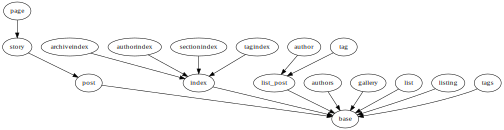

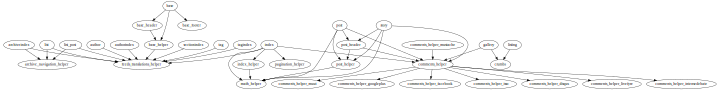

In [60]:
import graphviz
d = graphviz.Digraph()
d.edge("archiveindex", "archive_navigation_helper")
d.edge("archiveindex", "feeds_translations_helper")
d.edge("author", "feeds_translations_helper")
d.edge("authorindex", "feeds_translations_helper")
d.edge("base", "base_helper")
d.edge("base", "base_header")
d.edge("base", "base_footer")
d.edge("base_header", "base_helper")
d.edge("base_helper", "feeds_translations_helper")
d.edge("comments_helper", "comments_helper_disqus")
d.edge("comments_helper", "comments_helper_livefyre")
d.edge("comments_helper", "comments_helper_intensedebate")
d.edge("comments_helper", "comments_helper_muut")
d.edge("comments_helper", "comments_helper_googleplus")
d.edge("comments_helper", "comments_helper_facebook")
d.edge("comments_helper", "comments_helper_isso")
d.edge("comments_helper_mustache", "comments_helper")
d.edge("gallery", "comments_helper")
d.edge("gallery", "crumbs")
d.edge("index", "index_helper")
d.edge("index", "math_helper")
d.edge("index", "comments_helper")
d.edge("index", "pagination_helper")
d.edge("index", "feeds_translations_helper")
d.edge("index_helper", "math_helper")
d.edge("list", "archive_navigation_helper")
d.edge("list", "feeds_translations_helper")
d.edge("list_post", "archive_navigation_helper")
d.edge("list_post", "feeds_translations_helper")
d.edge("listing", "crumbs")
d.edge("post", "post_helper")
d.edge("post", "post_header")
d.edge("post", "comments_helper")
d.edge("post", "math_helper")
d.edge("post_header", "post_helper")
d.edge("post_header", "comments_helper")
d.edge("post_helper", "math_helper")
d.edge("sectionindex", "feeds_translations_helper")
d.edge("story", "post_helper")
d.edge("story", "post_header")
d.edge("story", "comments_helper")
d.edge("story", "math_helper")
d.edge("tag", "feeds_translations_helper")
d.edge("tagindex", "feeds_translations_helper")
imports = d

graphviz.Source("""
digraph {
	annotation_helper
	archive_navigation_helper
	base_footer
	base_header
	base_helper
	comments_helper
	comments_helper_disqus
	comments_helper_facebook
	comments_helper_googleplus
	comments_helper_intensedebate
	comments_helper_isso
	comments_helper_livefyre
	comments_helper_mustache
	comments_helper_muut
	crumbs    
	feeds_translations_helper
	index_helper
	math_helper
	pagination_helper
	post_header
	post_helper
	post_list_directive
	slides
}""")
d = graphviz.Digraph()
d.node("page")
d.node("post")
d.edge("archiveindex", "index")
d.edge("author", "list_post")
d.edge("authorindex", "index")
d.edge("authors", "base")
d.node("base")
d.edge("gallery", "base")
d.edge("index", "base")
d.edge("list", "base")
d.edge("list_post", "base")
d.edge("listing", "base")
d.edge("page", "story")
d.edge("post", "base")
d.edge("sectionindex", "index")
d.edge("story", "post")
d.edge("tag", "list_post")
d.edge("tagindex", "index")
d.edge("tags", "base")
extends = d

extends.attr(size='7,7')
display(extends)
imports.attr(size='10,10')
display(imports)

In [61]:
imports.source

'digraph {\n\tarchiveindex -> archive_navigation_helper\n\tarchiveindex -> feeds_translations_helper\n\tauthor -> feeds_translations_helper\n\tauthorindex -> feeds_translations_helper\n\tbase -> base_helper\n\tbase -> base_header\n\tbase -> base_footer\n\tbase_header -> base_helper\n\tbase_helper -> feeds_translations_helper\n\tcomments_helper -> comments_helper_disqus\n\tcomments_helper -> comments_helper_livefyre\n\tcomments_helper -> comments_helper_intensedebate\n\tcomments_helper -> comments_helper_muut\n\tcomments_helper -> comments_helper_googleplus\n\tcomments_helper -> comments_helper_facebook\n\tcomments_helper -> comments_helper_isso\n\tcomments_helper_mustache -> comments_helper\n\tgallery -> comments_helper\n\tgallery -> crumbs\n\tindex -> index_helper\n\tindex -> math_helper\n\tindex -> comments_helper\n\tindex -> pagination_helper\n\tindex -> feeds_translations_helper\n\tindex_helper -> math_helper\n\tlist -> archive_navigation_helper\n\tlist -> feeds_translations_helper

### Massively Structure

Here is the structure of the [HTML5UP Massively](https://html5up.net/massively) template:

```
.
|-- LICENSE.txt
|-- README.txt
|-- assets
|   |-- css
|   |   |-- font-awesome.min.css
|   |   |-- main.css
|   |   `-- noscript.css
|   |-- fonts
|   |   |-- FontAwesome.otf
|   |   |-- fontawesome-webfont.eot
|   |   |-- fontawesome-webfont.svg
|   |   |-- fontawesome-webfont.ttf
|   |   |-- fontawesome-webfont.woff
|   |   `-- fontawesome-webfont.woff2
|   |-- js
|   |   |-- jquery.min.js
|   |   |-- jquery.scrollex.min.js
|   |   |-- jquery.scrolly.min.js
|   |   |-- main.js
|   |   |-- skel.min.js
|   |   `-- util.js
|   `-- sass
|       |-- base
|       |   |-- _page.scss
|       |   `-- _typography.scss
|       |-- components
|       |   |-- _box.scss
|       |   |-- _button.scss
|       |   |-- _form.scss
|       |   |-- _icon.scss
|       |   |-- _image.scss
|       |   |-- _list.scss
|       |   |-- _pagination.scss
|       |   |-- _section.scss
|       |   `-- _table.scss
|       |-- layout
|       |   |-- _footer.scss
|       |   |-- _header.scss
|       |   |-- _intro.scss
|       |   |-- _main.scss
|       |   |-- _nav.scss
|       |   |-- _navPanel.scss
|       |   `-- _wrapper.scss
|       |-- libs
|       |   |-- _functions.scss
|       |   |-- _mixins.scss
|       |   |-- _skel.scss
|       |   `-- _vars.scss
|       |-- main.scss
|       `-- noscript.scss
|-- elements.html
|-- generic.html
|-- images
|   |-- bg.jpg
|   |-- overlay.png
|   |-- pic01.jpg
|   |-- pic02.jpg
|   |-- pic03.jpg
|   |-- pic04.jpg
|   |-- pic05.jpg
|   |-- pic06.jpg
|   |-- pic07.jpg
|   |-- pic08.jpg
|   `-- pic09.jpg
`-- index.html
```

My original attempt to link this was the following:

 Note: I originally tried the following 

```
.
|-- assets
|   |-- css -> ../html5up/assets/css
|   |-- fonts -> ../html5up/assets/fonts
|   `-- js -> ../html5up/assets/js
|-- html5up
|   ...
`-- sass -> html5up/assets/sass
```

This failed, however, for a couple of reasons:

* I needed to add a `sass/targets` file to specify which style sheets should be compiled.  Since at this point I do not want to modify the HTML5UP source files, I needed to link the appropriate files into my own `sass` directory.
* Once these targets were specified, they conflicted with the pre-generated CSS files, so I also had to create that.  The final structure is thus:

```
.
|-- LICENSE
|-- assets
|   |-- css
|   |   `-- font-awesome.min.css -> ../../html5up/assets/css/font-awesome.min.css
|   |-- fonts -> ../html5up/assets/fonts
|   `-- js -> ../html5up/assets/js
|-- html5up
|   ...
`-- sass
    |-- base -> ../html5up/assets/sass/base
    |-- components -> ../html5up/assets/sass/components
    |-- layout -> ../html5up/assets/sass/layout
    |-- libs -> ../html5up/assets/sass/libs
    |-- main.scss -> ../html5up/assets/sass/main.scss
    |-- noscript.scss -> ../html5up/assets/sass/noscript.scss
    `-- targets
```
